<a href="https://colab.research.google.com/github/AdaTuanaDonmez/AdaTuanaDonmez/blob/main/w_Stock3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_datareader --upgrade


import pandas
import pandas_datareader
from pandas_datareader import DataReader
from datetime import datetime

stocks_list = [ "FB",
               "AMZN",
               "NFLX",
               "GOOG"
]


# a year ago today
start = datetime(datetime.now().year - 1,
                 datetime.now().month,
                 datetime.now().day)

end = datetime.now()


for stock in stocks_list:

  globals()[stock] = DataReader(stock,
                                "yahoo",
                                start,
                                end)



AttributeError: 'NoneType' object has no attribute 'group'

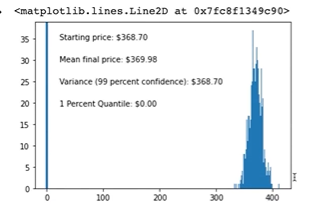

In [ ]:
FB.describe()

NameError: name 'FB' is not defined

In [ ]:
print(AMZN)

In [ ]:
NFLX.info()

In [ ]:
GOOG["High"].plot(legend = True,
                  figsize = (14, 6))

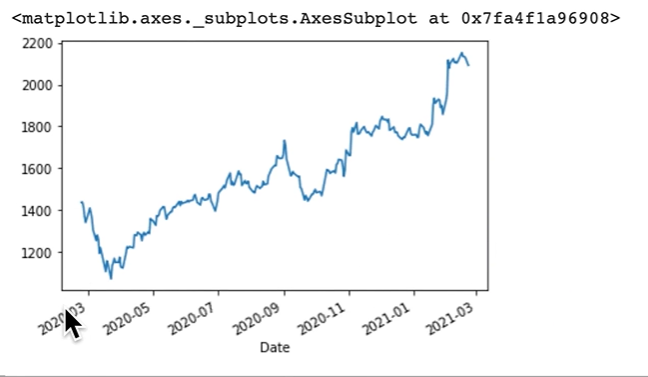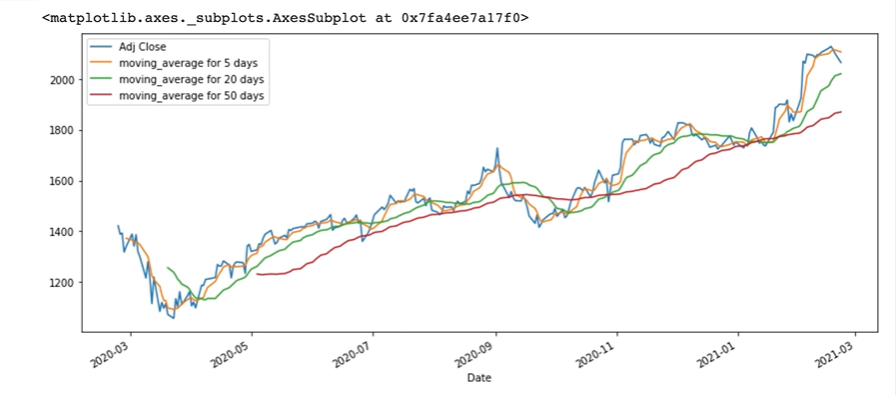

In [ ]:
# the graph is up

moving_average_intervals = [5, 20, 50]

for moving_average in moving_average_intervals:

  column_name = "moving_average for %s days" % (str(moving_average))

  GOOG[column_name] = GOOG["Adj Close"].rolling(moving_average).mean()

GOOG[["Adj Close",
      "moving_average for 5 days",
      "moving_average for 20 days",
      "moving_average for 50 days"]].plot(figsize(14, 6))

In [ ]:
GOOG["Daily Return"] = GOOG["Adj Close"],pct_change()

GOOG["Daily Return"].plot(figsize= (14,14),
                          legend = True,
                          linestyle = "--",
                          marker = "o")

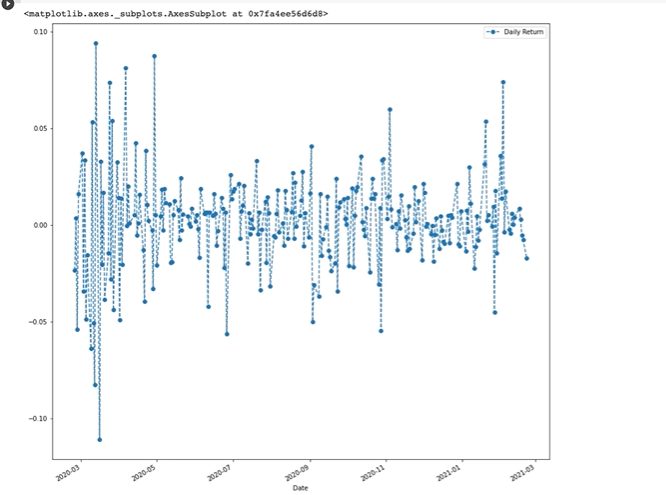

In [ ]:
import pandas
import pandas_datareader
from pandas_datareader import DataReader

adjusted_closing_dataframe = DataReader(stock,
                                "yahoo",
                                start,
                                end)["Adj Close"]
print(adjusted_closing_dataframe )

NameError: name 'stock' is not defined

In [ ]:
stocks_returns = adjusted_closing_dataframe.pct_change()

print(stocks_returns)

In [ ]:
import seaborn

seaborn.jointplot("GOOG",
                  "GOOG",
                  data = stocks_returns,
                  color = "orange"
)



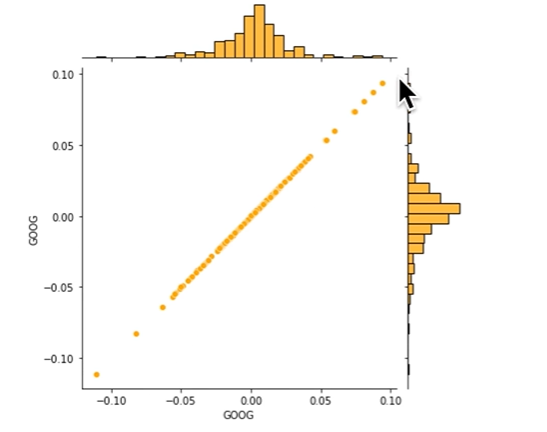

In [ ]:
seaborn.jointplot("AMZN",
                  "NFLX",
                  data = stocks_returns
)

NameError: name 'seaborn' is not defined

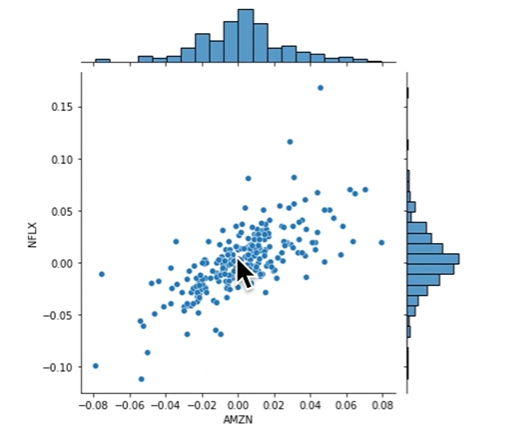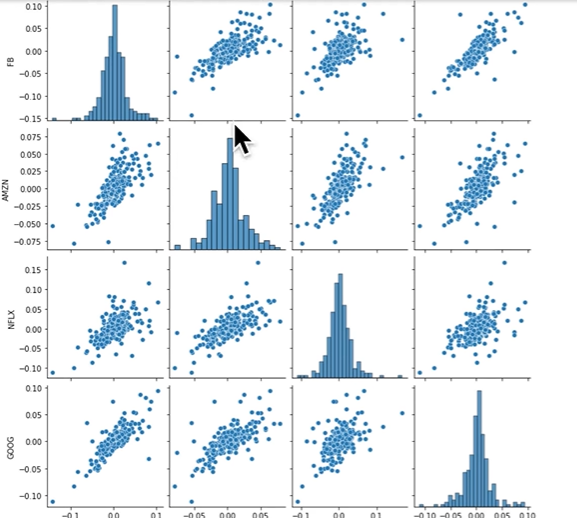

In [ ]:
seaborn.pairplot(data = stocks_returns.dropna())


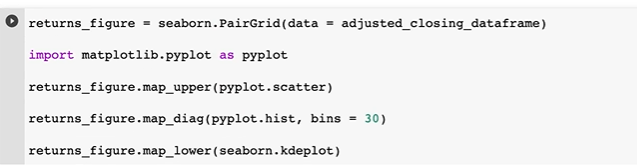

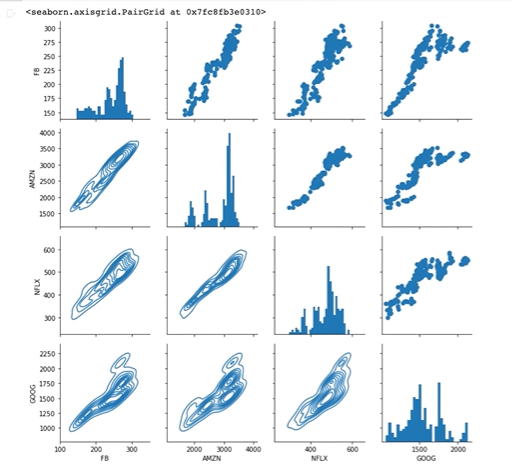

In [ ]:
print(stocks_returns.corr())

correlations = stocks_returns.corr()

seaborn.heatmap(data = correlations,
                fmt = "6g"
                )

In [ ]:
# RISK

returns = stocks_returns.dropna()

import numpy

circles_area = numpy.pi * 15

pyplot.scatter(x = returns.mean(),
               y = returns.std(),
               s = circles_area)

pyplot.xlabel("Expected Returns")
pyplot.ylabel("Risk") #std

for label, x, y in zip(returns.columns,
                       returns.mean(),
                       returns.std()):
  pyplot.annotate(label,
                  xy = (x,y),
                  xytext = (50,50),
                  textcoords = "offset points",
                  ha = "right",
                  va = "bottom",
                  arrowprops = dict(arrowstyle = "-",
                                     connectionstyle = "arc3, rad = -0.3"))

  # According to the graph Amazon has the highest returns and lowest risk - IMPORTANT !!!

NameError: name 'stocks_returns' is not defined

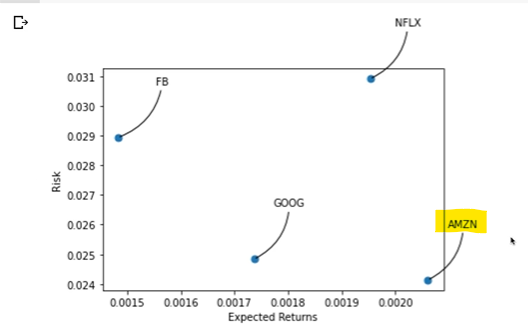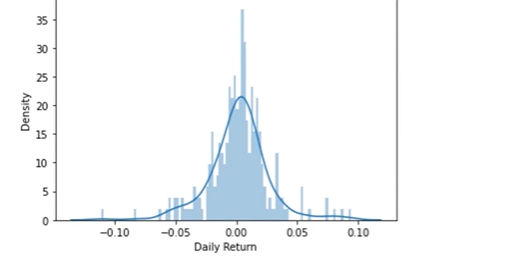

In [ ]:
#VALUE AT RISK

seaborn.distplot(GOOG["Daily Return"].dropna(),
                 bins = 100)



In [ ]:
returns["FB"].qunatile(0.05) * 100 # value at risk: worst we can lose that day is 4%

In [ ]:
returns["FB"].qunatile(0.95) * 100  # 5% of the time (95% confidence) we can lose 5% of the value

In [ ]:
#MONTE CARLO ANALYSIS

#mu is average

days = 365

dt = 1/days

sigma = returns.std()["NFLX"]

mu = returns.mean()["NFLX"]

def monte_carlo_analysis(starting_price,
                         days,
                         mu,
                         sigma):
  price = numpy.zero(days)

  price[0] = starting_price

  shock = numpy.zero(days)

  drift = numpy.zero(days)

  for day in range(1, days):
    shock[day] = numpy.random.normal(loc = mu*dt,
                                     scale = sigma * numpy.sqrt(dt) )
    drift[day] = mu * dt

    price[day] = price[day-1] + (price[day-1] * (drift[day] + shock[day]))

  return price


starting_price = 368.700012

for run in range(100):

  price =  monte_carlo_analysis(starting_price,
                         days,
                         mu,
                         sigma)

  pyplot.plot(price)

  pyplot.xlabel("Days")

  pyplot.ylabel("Price")


# returns a different colored line for each risk in a day, in this case 100 scenarios for a day

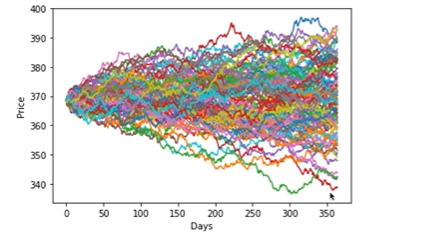

In [ ]:
number_of_runs = 1000

simulation = numpy.zeros(number_of_runs)

quantile = numpy.percentile(simulations, 1 )    #1st percentile

for run in range(number_of_runs):

  simulations[run] = monte_carlo_analysis(starting_price,
                         days,
                         mu,
                         sigma)[days - 1]

pyplot.hist(simulations, bin = 100)

pyplot.figtext(0.2, 0.8, s = "Starting price : $%.2f" %starting_price)  #s is label

pyplot.figtext(0.2, 0.7, s = "Mean final price : $%.2f" % simulations.mean())

pyplot.figtext(0.2, 0.6, s = "Variance (99 percent confidence): $%.2f" % (starting_price -quantile))

pyplot.figtext(0.2, 0.5, s = "1 Percent Quantile : $%.2f" % quantile )

pylpot.axvline( x = quantile, lineiwdth = 3)  # 99 percent of the time the loss is zero, so for NFLX there is high confidence in the stock

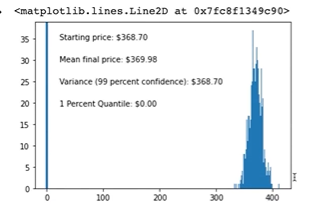